In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("kc_house_data.csv")

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# 과제
## 이 데이터는 어떠한 맥락에서 수집된 것이며 어떠한 방향으로 사용될 수 있을 지에 대해서 논하라

먼저 다음은 [카글](https://www.kaggle.com/shivachandel/kc-house-data)의 글이다.


Online property companies offer valuations of houses using machine learning techniques. The aim of this report is to predict the house sales in King County, Washington State, USA using Multiple Linear Regression (MLR). The dataset consisted of historic data of houses sold between May 2014 to May 2015.
We will predict the sales of houses in King County with an accuracy of at least 75-80% and understand which factors are responsible for higher property value - $650K and above.”

The dataset consists of house prices from King County an area in the US State of Washington, this data also covers Seattle. The dataset was obtained from Kaggle. This data was published/released under CC0: Public Domain. Unfortunately, the user has not indicated the source of the data. Please find the citation and database description in the Glossary and Bibliography.
The dataset consisted of 21 variables and 21613 observations.

데이터를 잘 이해하려면 그 데이터를 만든, 또는 추출한 설명을 자세히 읽어야 한다. 여기서 알 수 있드시 predict the house sales in King County, Washington State, USA using Multiple Linear Regression (MLR) 라는 목적으로 만들어진 데이터 이다. 실제로 방의 수 등 여러 칼럼정보를 가지고 있으며 우리가 주요시하는 변수인 가격변수와 관계를 분석하고 예측하는데 충분히 활용가능하다

## "sqft_living","sqft_lot" 열에서 아웃라이어를 찾고 그 아웃라이어가 어떠한 의미를 가질 수 있는 지에 대해서 논하라

In [16]:
data.sqft_living.isna().value_counts()

False    21613
Name: sqft_living, dtype: int64

In [19]:
data.sqft_lot.isna().value_counts()

False    21613
Name: sqft_lot, dtype: int64

In [12]:
data.sqft_living.describe()

count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [20]:
data.sqft_lot.describe()

count    2.161300e+04
mean     1.510697e+04
std      4.142051e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068800e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

62평이 2206.4064 sqft라고 한다. lot은 마당을 포함하므로 더 크다고할 수 있다 하더라도 max인 13540는 outlier로 볼 수 있다.

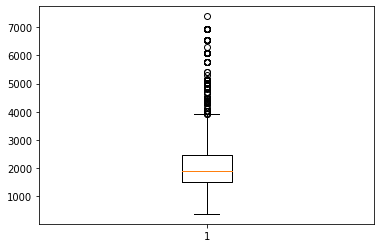

In [32]:
plt.boxplot(data.sqft_living)
plt.show()

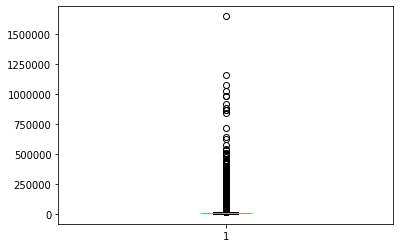

In [25]:
plt.boxplot(data.sqft_lot)
plt.show()

사실 가장이상한것은 lot의 사이즈 보다 living의 사이즈가 더 큰 것이다. 아래와 같이 789개의 raw가 보인다. 해당 raw를 자세히 볼 필요가 있다.

In [28]:
data[data.sqft_living>=data.sqft_lot]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
63,9528102996,20141207T000000,549000.0,3,1.75,1540,1044,3.0,0,0,...,8,1540,0,2014,0,98115,47.6765,-122.320,1580,3090
116,3362400431,20140626T000000,518500.0,3,3.50,1590,1102,3.0,0,0,...,8,1590,0,2010,0,98103,47.6824,-122.347,1620,3166
175,7234600798,20150210T000000,425000.0,3,2.50,1120,1100,2.0,0,0,...,8,820,300,2008,0,98122,47.6106,-122.310,1590,1795
406,7821200390,20140806T000000,450000.0,3,2.00,1290,1213,3.0,0,0,...,8,1290,0,2001,0,98103,47.6609,-122.344,1290,3235
547,7899800860,20150319T000000,259950.0,2,2.00,1070,649,2.0,0,0,...,9,720,350,2008,0,98106,47.5213,-122.357,1070,928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21595,1972201967,20141031T000000,520000.0,2,2.25,1530,981,3.0,0,0,...,8,1480,50,2006,0,98103,47.6533,-122.346,1530,1282
21601,5100403806,20150407T000000,467000.0,3,2.50,1425,1179,3.0,0,0,...,8,1425,0,2008,0,98125,47.6963,-122.318,1285,1253
21604,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,...,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21607,2997800021,20150219T000000,475000.0,3,2.50,1310,1294,2.0,0,0,...,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265


## "sqft_living","sqft_lot" 열의 관계성을 분석하고 어떠한 의미를 가질 수 있는 지에 대해서 논하라

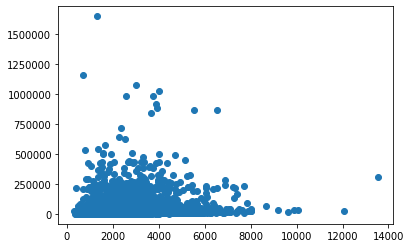

In [33]:
plt.scatter(data.sqft_living, data.sqft_lot)
plt.show()

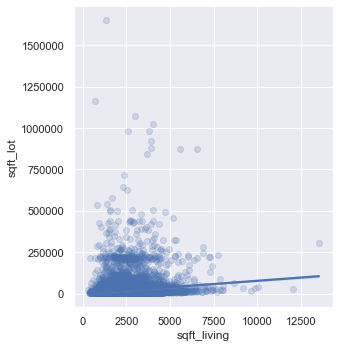

In [43]:
sns.set()
sns.lmplot('sqft_living', 'sqft_lot', data=data,
           scatter_kws={"alpha": 0.2})
plt.show()

In [47]:
trim_data = data[(data.sqft_living<data.sqft_living.quantile(0.9)) &
                (data.sqft_lot<data.sqft_lot.quantile(0.9))]
trim_data.shape

(17873, 21)

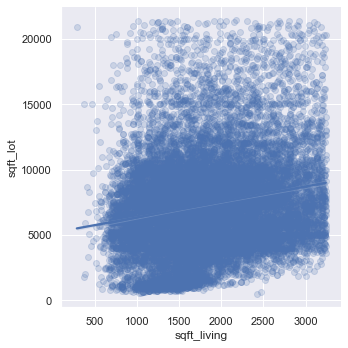

In [48]:
sns.set()
sns.lmplot('sqft_living', 'sqft_lot', data=trim_data,
           scatter_kws={"alpha": 0.2})
plt.show()

아주 변동성이 크나 living이 증가할때 lot이 증가하는 경향이 보인다

## 이 데이터의 월별로 거래량과 거래 가격 평균 등을 분석하고 시계열 그림을 그린 후 어떤 의미를 가질 수 있는 지에 대해서 논하라.

In [65]:
data['date'] = pd.to_datetime(data.date)

In [67]:
data['month'] = data.date.dt.month

In [71]:
pivot_df = data.pivot_table(index='month',values='price',aggfunc=['count','mean'])
pivot_df.columns = ['거래량','평균가격']

In [78]:
pivot_df

,거래량,평균가격
month,,
1,978,525870.889571
2,1250,507851.371200
3,1875,543977.187200
4,2231,561837.774989
5,2414,550768.785833
6,2180,558002.199541
7,2211,544788.764360
8,1940,536445.276804
9,1774,529253.821871


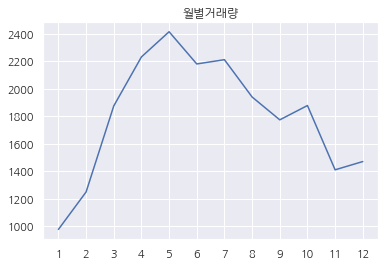

In [85]:
plt.rc('font', family='NanumGothic')

plt.plot(pivot_df.index, pivot_df.거래량)
plt.xticks(pivot_df.index)
plt.title('월별거래량')
plt.show()

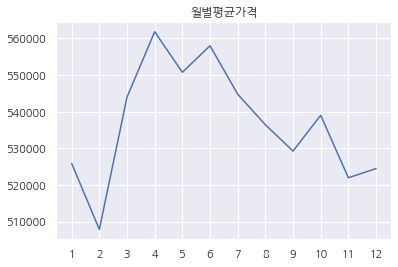

In [86]:
plt.plot(pivot_df.index, pivot_df.평균가격)
plt.xticks(pivot_df.index)
plt.title('월별평균가격')
plt.show()

새 학기가 시작하는45월 즉 봄~여름철에 거래량도 많고, 자연스럽게 평균가격도 높아지나 겨울이 될수록 감소하는 추세가 보임. 겨울에 전반적으로 감소하나 4월의 6개월이후인 10월에 살짝 증가하는 추세를 보임. 이는 (외국의 경우 동일한지 모르겠으나) 1년 또는 6개월 단위의 거래하는 한국과 유사한 경향이 아닐까 추측해봄

## 이 데이터에 대해 추가적으로 논할 수 있는 부분이나 차후 분석 방법에 대해서 논하라

외부적인 요인, 예를 들어 환경적인 요인에 따른 집값에 영향을 줄 수 있으나 해당 칼럼에는 그러한 정보가 포함되어 있지 않다. 해당 부분을 고려하고, 각 외부 요인이 어떤 영향을 주는지 분석가능하다. 또한 해당 외부요인별로 cluster을 만드는등 외부요인을 제외한 순수효과를 분석해 볼 수 도 있다.